### # 241,010,303       : 이유식

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

In [3]:
chunk = {}
for i in range(13):
    chunk[i] = pd.read_csv('./chunk/chunk{}.csv'.format(i))


In [5]:
len(chunk)

13

In [41]:
chunk[12].tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3321035,123321035,2018-09-28 17:00:21,"18,342,102","3,170","100,913,544","237,040,103",2
3321036,123321036,2018-09-28 17:00:21,"18,342,102","3,800","100,913,555","237,040,103",2
3321037,123321037,2018-09-28 17:00:22,"24,137,068","1,699,000","101,984,766","233,040,120",2
3321038,123321038,2018-09-28 17:00:25,"5,357,454","25,000","110,485,856","240,010,305",2
3321039,123321039,2018-09-28 17:00:27,"21,865,461","55,900","100,371,485","233,080,119",2


### #Chunk[12]내의 기저귀 거래 개수 확인

In [6]:
sum(chunk[12].old_admin_category_id == '241,010,303')

10965

### # 거래가 언제부터 이루어지는지?

In [9]:
chunk[0][chunk[0].old_admin_category_id == '241,010,303'].head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3410,3410,2018-01-01 00:04:44,"3,452,631","28,800","2,016,742","241,010,303",1
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
9733,9733,2018-01-01 00:10:58,"6,691,511","11,500","2,205,237","241,010,303",1
12399,12399,2018-01-01 00:13:31,"22,009,363","4,900","2,404,075","241,010,303",1
12415,12415,2018-01-01 00:13:32,"1,141,791","20,280","1,469,081","241,010,303",1


In [7]:
chunk[12][chunk[12].old_admin_category_id == '241,010,303'].tail() # 9월까지 거래 잘 이루어지네

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3317433,123317433,2018-09-28 16:45:10,"13,650,173","24,900","3,694,320","241,010,303",1
3319790,123319790,2018-09-28 16:54:31,"18,009,189","31,900","4,031,967","241,010,303",1
3319844,123319844,2018-09-28 16:54:46,"4,884,328","40,500","4,031,967","241,010,303",1
3320626,123320626,2018-09-28 16:57:56,"1,740,118","32,100","3,694,320","241,010,303",1
3320798,123320798,2018-09-28 16:58:35,"1,711,192","22,750","3,778,585","241,010,303",1


---

- 연습

In [52]:
y = pd.DataFrame()

In [57]:
x = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})

In [58]:
x

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
pd.concat([y,x])

,a,b
0,1,4
1,2,5
2,3,6


---

### #기저귀 데이터 빼올거야

In [13]:
bbfood = pd.DataFrame()

In [14]:
for i in range(13):
  bbfood = pd.concat([bbfood, chunk[i][chunk[i].old_admin_category_id == '241,010,303']])

In [15]:
bbfood.shape  # 거래 총 25만건

(252629, 7)

In [16]:
bbfood.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3410,3410,2018-01-01 00:04:44,"3,452,631","28,800","2,016,742","241,010,303",1
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
9733,9733,2018-01-01 00:10:58,"6,691,511","11,500","2,205,237","241,010,303",1
12399,12399,2018-01-01 00:13:31,"22,009,363","4,900","2,404,075","241,010,303",1
12415,12415,2018-01-01 00:13:32,"1,141,791","20,280","1,469,081","241,010,303",1


In [17]:
bbfood.tail()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3317433,123317433,2018-09-28 16:45:10,"13,650,173","24,900","3,694,320","241,010,303",1
3319790,123319790,2018-09-28 16:54:31,"18,009,189","31,900","4,031,967","241,010,303",1
3319844,123319844,2018-09-28 16:54:46,"4,884,328","40,500","4,031,967","241,010,303",1
3320626,123320626,2018-09-28 16:57:56,"1,740,118","32,100","3,694,320","241,010,303",1
3320798,123320798,2018-09-28 16:58:35,"1,711,192","22,750","3,778,585","241,010,303",1


### #filter 만들어주기

In [18]:
filter = pd.to_datetime('2018-08-01')

In [19]:
bbfood['biz_dt'] = pd.to_datetime(bbfood['biz_dt'])

### # filter이용하기

In [20]:
bbfood_train = bbfood[bbfood.biz_dt < filter]

In [21]:
bbfood_test = bbfood[bbfood.biz_dt >= filter]

In [22]:
bbfood_train.shape

(193645, 7)

In [23]:
bbfood_test.shape

(58984, 7)

In [24]:
bbfood_train.shape[0] + bbfood_test.shape[0] == bbfood.shape[0]

True

### # 저장

In [25]:
bbfood_train.to_excel('bbfood_train.xlsx')
bbfood_test.to_excel('bbfood_test.xlsx')

In [26]:
pd.read_excel('bbfood_train.xlsx').shape

(193645, 7)

In [27]:
pd.read_excel('bbfood_test.xlsx').shape

(58984, 7)

---

---

### # 데이터 로딩

In [3]:
bbfood_train = pd.read_excel('bbfood_train.xlsx')
#bbfood_test = pd.read_excel('bbfood_test.xlsx')

In [91]:
bbfood_test = pd.read_excel('bbfood_test.xlsx')

In [4]:
bbfood_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193645 entries, 3410 to 9110015
Data columns (total 7 columns):
Unnamed: 0               193645 non-null int64
biz_dt                   193645 non-null datetime64[ns]
m_id                     193645 non-null object
order_price              193645 non-null object
prod_no                  193645 non-null object
old_admin_category_id    193645 non-null object
serv_cd                  193645 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 11.8+ MB


### # 이런식의 계산을 원해

In [38]:
pd.to_datetime('2018-01-01') - pd.to_datetime('2018-01-02')

Timedelta('-1 days +00:00:00')

In [39]:
bbfood_train.shape[0]  # 전체 약 55만건의 구매이력 

545775

In [41]:
bbfood_train.m_id.nunique() # 이 기저귀 카테고리에 약 20만명의 구매이력이 있다..!

212550

---

- 연습

-이런식으로 timedelta 만들거야

In [44]:
a = bbfood.iloc[100000]['biz_dt'] - bbfood.iloc[0]['biz_dt']

In [45]:
a

Timedelta('51 days 12:21:43')

-t로써 쓸 것! 

In [46]:
a.days

51

---

- unique한 MEMBER ID불러와

In [5]:
mid = bbfood_train.m_id.unique()

In [6]:
len(mid)

65850

In [7]:
mid.shape

(65850,)

In [8]:
mid[1000]

'5,005,039'

### # 이런식으로 : 2번째 고객의 구매이력

In [9]:
bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[1]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8880,8880,2018-01-01 00:10:09,"3,588,037","31,500","2,599,479","241,010,303",1
6804304,6804304,2018-01-15 03:07:09,"3,588,037","31,500","2,599,479","241,010,303",1
709178,10709178,2018-01-24 08:24:30,"3,588,037","31,500","2,599,479","241,010,303",1
4146283,14146283,2018-02-01 07:03:00,"3,588,037","25,200","2,599,479","241,010,303",1
7860062,17860062,2018-02-07 17:13:16,"3,588,037","25,200","2,599,479","241,010,303",1
2592932,22592932,2018-02-21 10:58:40,"3,588,037","31,500","2,599,479","241,010,303",1
2594426,22594426,2018-02-21 11:02:32,"3,588,037","31,500","2,599,479","241,010,303",1
6598494,26598494,2018-03-02 15:04:40,"3,588,037","31,500","2,599,479","241,010,303",1
6599887,26599887,2018-03-02 15:08:25,"3,588,037","31,500","2,599,479","241,010,303",1
9583210,29583210,2018-03-08 00:05:12,"3,588,037","19,500","2,016,811","241,010,303",1


-> 이런식으로

---

In [11]:
bbfood_train.m_id.unique()[1] # 두번째 고객 정보

'3,588,037'

In [12]:
sum(bbfood_train.m_id == '3,588,037') #이 사람의 구매이력

19

---

(1) 테스트

In [20]:
import time

start_time = time.time()

c = {}
t = []
for i in range(len(bbfood_train.m_id.unique()[:100])):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)
    for j in range(c[i].shape[0]-1):
        
        t.append((c[i].iloc[j]['biz_dt'] - c[i].iloc[j+1]['biz_dt']).days) #밑의 if문이랑 같은 결과야(해본결과, len가 1이면 iiappend안해줘)

        
elapsed_time = time.time() - start_time
print(elapsed_time)

3.9238269329071045


(2) 테스트

In [26]:
import time

start_time = time.time()

c = {}
t = np.array([])
for i in range(len(bbfood_train.m_id.unique()[:100])):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)

    t = np.append(t, [j.days for j in c[i].biz_dt.diff()])
        
elapsed_time = time.time() - start_time
print(elapsed_time)

3.3005638122558594


In [27]:
t

array([  nan,  -31.,  -21.,  -10.,   -6.,  -14.,  -34.,  -17.,   -7.,
        -15.,   nan,  -38.,  -10.,  -26.,   -8.,  -11.,   -5.,  -10.,
         -8.,   -4.,   -6.,   -1.,  -10.,   -1.,  -14.,   -7.,   -8.,
        -10.,  -15.,   nan,   nan,  -15.,  -22.,   -1.,   -5., -108.,
         nan,   -5.,   -9.,  -22.,  -22.,  -14.,   nan,  -63.,   nan,
        -16.,  -16.,  -15.,   -1.,   -7.,  -10.,  -15.,  -14.,  -18.,
        -30.,  -12.,  -20.,    0.,  -30.,   nan,   nan,   -1.,   nan,
         nan,  -14.,  -12.,  -14.,  -19.,  -18.,  -12.,   -8.,  -14.,
         -8.,  -19.,  -13.,  -37.,   -7.,  -10.,   -5.,   -4.,   -2.,
         -4.,   nan,   nan,  -30.,  -92.,   nan,   -9.,    0.,   nan,
         nan,   nan,  -15.,  -27.,  -14.,  -27.,  -22.,  -16.,  -15.,
         -9.,  -12.,  -12.,  -25.,   nan,   nan,  -51.,  -13.,  -33.,
        -10.,   -7.,   -3.,   -1.,   -7.,  -11.,   -4.,   nan,   nan,
        -72.,  -80.,   nan,  -42.,  -29.,   nan,   nan,  -15.,   -6.,
        -11.,   -1.,

-> 시간 이정도 단축되었어! : (2)으로 한다!

---

# <U>**(2) 리스트 컴프리헨션, diff()메소드*</U>

In [28]:
import time

start_time = time.time()

c = {}
t = np.array([])
for i in range(len(bbfood_train.m_id.unique())):
    c[i] = bbfood_train[bbfood_train.m_id == bbfood_train.m_id.unique()[i]].sort_values(by = 'biz_dt', ascending = False)
    

    t = np.append(t, [j.days for j in c[i].biz_dt.diff()])
        
elapsed_time = time.time() - start_time
print(elapsed_time)

2081.5051209926605


In [30]:
len(t)

193645

In [34]:
t

array([ nan, -31., -21., ...,  nan,  nan,  nan])

In [31]:
tt = pd.DataFrame(t)

In [35]:
tt.head(20)

,0
0,NaN
1,-31.0
2,-21.0
3,-10.0
4,-6.0
5,-14.0
6,-34.0
7,-17.0
8,-7.0
9,-15.0


In [37]:
tt.to_excel('bbfood_t.xlsx')

In [36]:
tt.count()

0    127795
dtype: int64

In [38]:
len(tt)-tt.count()  # 19만개 중, 6만5천개가 distinct user : datetime.diff() 메소드 이용하면, 첫번째 obs는 nan이 되니깐 맞아!

0    65850
dtype: int64

In [41]:
bbfood_train.shape

(193645, 7)

In [40]:
bbfood_train.m_id.unique().shape

(65850,)

- 확인!

In [42]:
bbfood_train.m_id.nunique()

65850

---

### # 

In [49]:
tt = tt.dropna()*(-1)   # t값 순수하게 얻은거야

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5fe828>]],
      dtype=object)

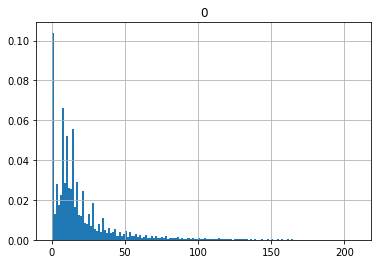

In [89]:
pd.DataFrame(tt).hist(bins=150, density = True)

In [52]:
tmean = tt.mean()

In [55]:
tmean

0    19.484025
dtype: float64

### # fit.gamma()를 통해 parameter추정

In [82]:
22/5

4.4

In [56]:
import scipy.stats as stats

In [57]:
stats.gamma.fit(tt)

(0.92498631615498, -5.457201630437631e-23, 20.574170101037616)

In [58]:
stats.gamma.fit(tt, loc=0)

(0.8661504712076704, -4.335382574184874e-25, 23.587740370047747)

### # gamma mle를 통해 parameter추정

In [68]:
tt.shape

(127795, 1)

In [59]:
x = np.linspace (0, 100, 200)   # 0부터 100까지 200개로 !

In [63]:
x[-10:]

array([ 95.47738693,  95.9798995 ,  96.48241206,  96.98492462,
        97.48743719,  97.98994975,  98.49246231,  98.99497487,
        99.49748744, 100.        ])

In [61]:
x.shape

(200,)

In [64]:
tt.mean()

0    19.484025
dtype: float64

In [65]:
tt.var()

0    536.669234
dtype: float64

---

### # a와 b를 간단히 이렇게 정할 수 있어.

In [66]:
b = tt.mean()/tt.var()

In [67]:
a = b*tt.mean()

---

In [ ]:
y = stats.gamma.pdf(x, a=29, scale=0.33333)

In [87]:
r = stats.gamma.rvs(a,scale=1/b , size = tt.shape[0])  # scale = 1/rate

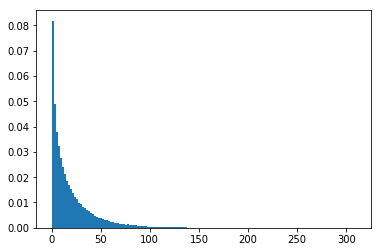

In [88]:
fig, ax = plt.subplots(1, 1)

ax.hist(r, density=True, bins = 150)
plt.show()

---

In [79]:
r = stats.gamma.rvs(a,scale=b , size = tt.shape[0])

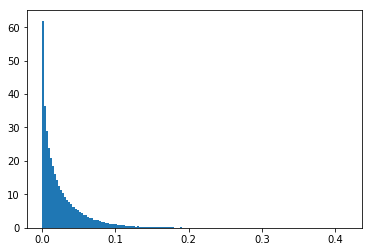

In [80]:
fig, ax = plt.subplots(1, 1)

ax.hist(r, density=True, bins = 150)
plt.show()

In [83]:
alpha = 5
loc = 100.5
beta = 22
data = stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
print(data)

[173.50850997 169.84899623 245.99547401 ... 302.50485336 247.80510857
 159.88249037]


In [84]:
data.mean()

211.04507743367165

In [85]:
data.var()

2373.0496830577486

In [86]:
alpha*beta**2

2420

### # test_id[0]를 예측해보자!

In [92]:
bbfood_test.head()

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9110557,99110557,2018-08-01 00:00:31,"20,907,774","51,400","3,885,380","241,010,303",1
9112529,99112529,2018-08-01 00:03:15,"5,527,091","30,900","1,490,322","241,010,303",1
9113255,99113255,2018-08-01 00:04:03,"4,767,229","32,800","1,657,529","241,010,303",1
9113517,99113517,2018-08-01 00:04:22,"13,768,175","32,800","1,657,529","241,010,303",1
9113528,99113528,2018-08-01 00:04:22,"13,768,175","25,900","3,559,471","241,010,303",1


In [95]:
test_id = bbfood_test.m_id.unique()[:10]

### # 이 사람의 구매이력

In [99]:
bbfood_train[bbfood_train.m_id == test_id[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9278539,79278539,2018-06-20 22:28:35,"20,907,774","32,000","3,757,451","241,010,303",1
510020,80510020,2018-06-24 14:03:54,"20,907,774","3,390","1,659,313","241,010,303",1
1827621,81827621,2018-06-27 08:59:40,"20,907,774","26,300","1,659,313","241,010,303",1
5015587,85015587,2018-07-03 22:37:33,"20,907,774","29,690","1,659,313","241,010,303",1
747689,90747689,2018-07-13 23:11:59,"20,907,774","5,300","3,653,074","241,010,303",1
747697,90747697,2018-07-13 23:12:00,"20,907,774","30,900","1,490,322","241,010,303",1


In [100]:
bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1:]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
747697,90747697,2018-07-13 23:12:00,"20,907,774","30,900","1,490,322","241,010,303",1


### # t_ : elapsed time interval between the last purchase of product A_i by the customer and the current time:

In [133]:
bbfood_test[bbfood_test.m_id == test_id[0]].iloc[0].biz_dt    # test_data에서 첫 구매

Timestamp('2018-08-01 00:00:31')

In [128]:
bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt  

Timestamp('2018-07-13 23:12:00')

In [134]:
current = pd.to_datetime('2018-08-01')

In [146]:
t_ = (current - bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt).days

In [147]:
t_

18

### #  t_purch : elapsed time between first and last purcahse time 

In [148]:
t_purch = (bbfood_train[bbfood_train.m_id == test_id[0]].iloc[-1].biz_dt - bbfood_train[bbfood_train.m_id == test_id[0]].iloc[0].biz_dt).days

### # aggregation t_mean

In [117]:
tmean

0    19.484025
dtype: float64

### # user's  t_mean

In [149]:
tmean_user = bbfood_train.biz_dt[bbfood_train.m_id == test_id[0]].diff().mean().days

### modified lambda : k = 6

In [140]:
k = 6

In [141]:
a, b

(0    0.707377
 dtype: float64, 0    0.036305
 dtype: float64)

In [142]:
current

Timestamp('2018-08-01 00:00:00')

In [151]:
(k+a)/(t_purch+2*abs(tmean_user-tmean)+b)

0    0.124201
dtype: float64

- current가 7월17일이라면?

In [ ]:
current = pd.to_datetime('')